***Lets take the results from the [2] and make a swarm plot for the hyena_embeds and hyena_embeds_pe***

**Remember this is the results from one-epoch**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import textwrap

In [2]:
# ==================== Constants ============================
DIR_DICT = {
    './hyena_embeds/kfold_results/': './hyena_embeds/kfold_plots/',
    './hyena_embeds_pe/kfold_results/': './hyena_embeds_pe/kfold_plots/',
    './fine_tuned_hyena_embeds/kfold_results/': './fine_tuned_hyena_embeds/kfold_plots/',
    './fine_tuned_hyena_embeds_pe/kfold_results/': './fine_tuned_hyena_embeds_pe/kfold_plots/'
}
TOP_PERCENT = 0.3  # Add your constant here to take the top x% models

In [3]:
# ==================== Defining Functions ============================

def load_kfold_results(kfold_results_dir):
    kfold_results_files = glob.glob(f'{kfold_results_dir}/*.csv')
    if not kfold_results_files:
        print(f"No CSV files found in directory {kfold_results_dir}")
        return []
    
    print('Kfold Results Files:', len(kfold_results_files))
    return kfold_results_files

def read_kfold_results(kfold_results_files):
    kfold_results_dict = {}
    for file in kfold_results_files:
        try:
            single_kfold_result_df = pd.read_csv(file)
            kfold_results_dict[file] = single_kfold_result_df
        except Exception as e:
            print(f"Error reading file {file}: {e}")

    # Sort dataframes by their average r2 values and keep the top x%
    avg_r2_values = {file: df['r2'].mean() for file, df in kfold_results_dict.items()}
    sorted_files = sorted(avg_r2_values.keys(), key=lambda x: avg_r2_values[x], reverse=True)
    top_files = sorted_files[:int(TOP_PERCENT * len(sorted_files))]

    top_kfold_results_dict = {file: kfold_results_dict[file] for file in top_files}

    print('Kfold Results:', len(top_kfold_results_dict))
    return top_kfold_results_dict

def create_swarm_plot(kfold_results_df, path_str, dict_name):
    combined_df = pd.concat(kfold_results_df.values(), ignore_index=True)
    title = dict_name.split('/')[1].replace('_', ' ').upper()


    print('Combined dataframe shape:', combined_df.shape)

    # Function to wrap x-labels
    def wrap_labels(label):
        text = label.get_text()
        text = text.replace('_', ' ')  # Remove underscores
        text = text.upper()           # Capitalize text
        return '\n'.join(textwrap.wrap(text, width=10))

    plt.figure(figsize=(12, 6))
    ax = sns.swarmplot(data=combined_df, x='file_name', y='r2', palette='pastel', hue='type')

    plt.title(f'R-squared Kfold Results - {title}')

    ax.set_xticklabels([wrap_labels(label) for label in ax.get_xticklabels()], rotation=0)

    plt.xlabel('Methods')
    plt.ylabel('R-squared')
    
    # Add grid lines on the y-axis with spacing of 0.10
    plt.yticks([i * 0.10 for i in range(int(combined_df['r2'].max() / 0.10) + 1)])

    # Enable grid lines
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{path_str}swarm_plot.png')
    plt.show()


Path to kfold results: ./hyena_embeds/kfold_results/
Kfold Results Files: 20
Kfold Results: 6
Combined dataframe shape: (120, 3)


/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

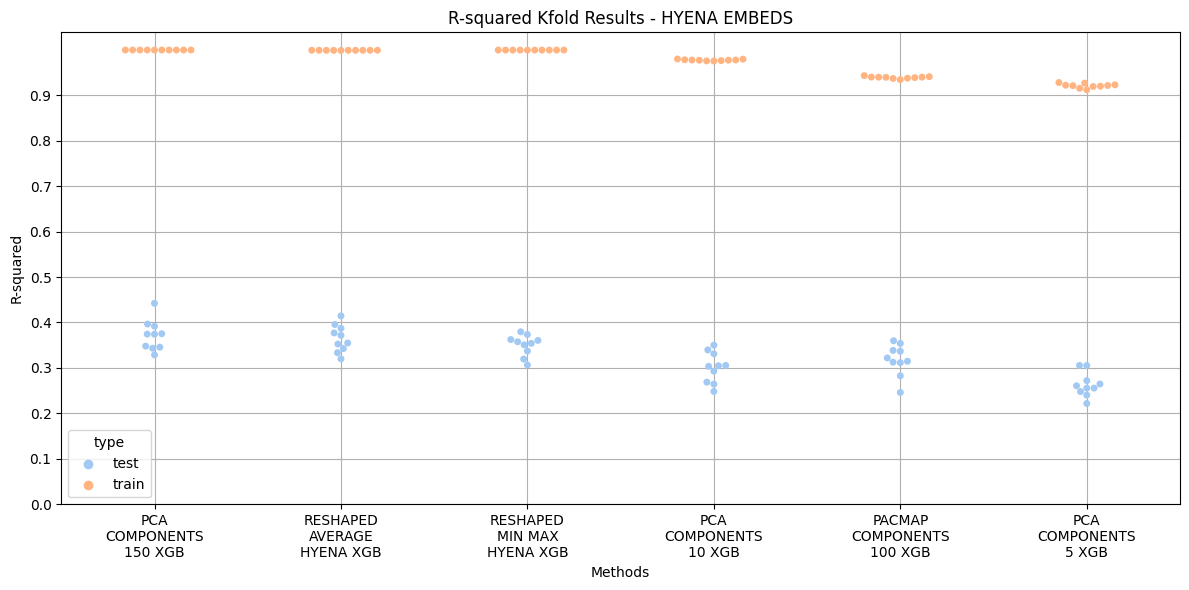

Path to kfold results: ./hyena_embeds_pe/kfold_results/
Kfold Results Files: 20
Kfold Results: 6
Combined dataframe shape: (120, 3)


/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

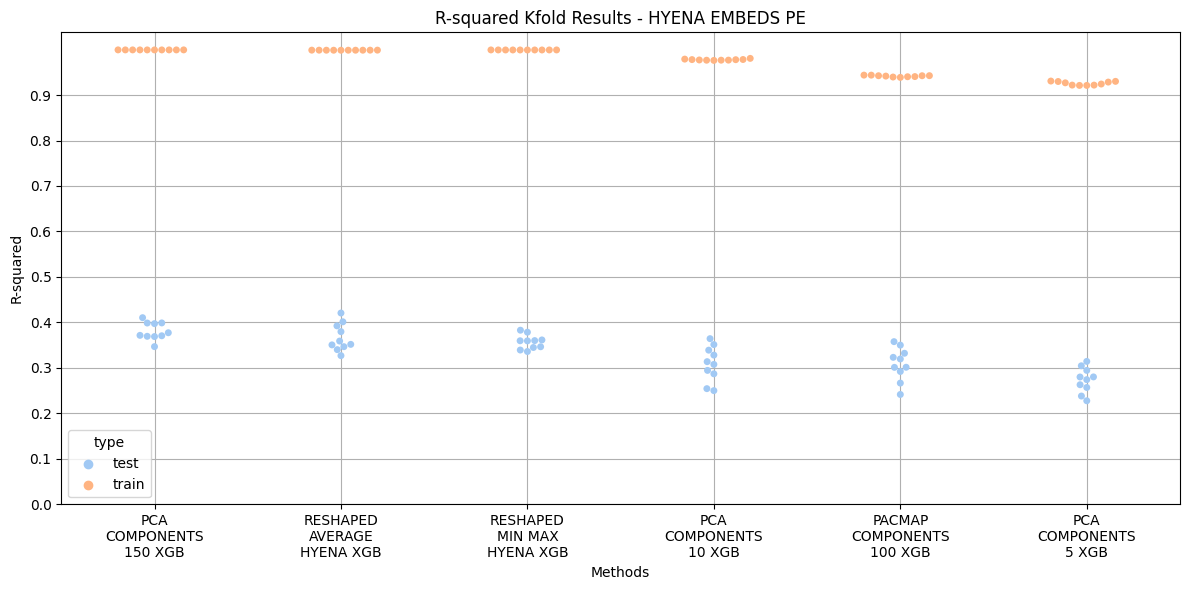

Path to kfold results: ./fine_tuned_hyena_embeds/kfold_results/
Kfold Results Files: 20
Kfold Results: 6
Combined dataframe shape: (120, 3)


/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

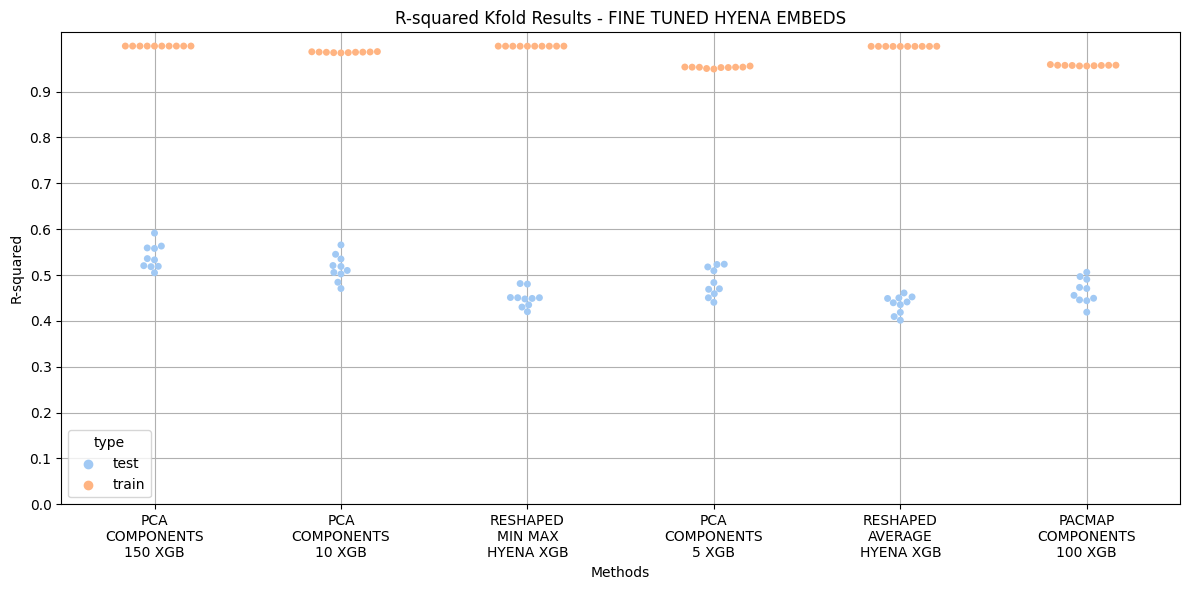

Path to kfold results: ./fine_tuned_hyena_embeds_pe/kfold_results/
Kfold Results Files: 20
Kfold Results: 6
Combined dataframe shape: (120, 3)


/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbates/hyena-dna/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

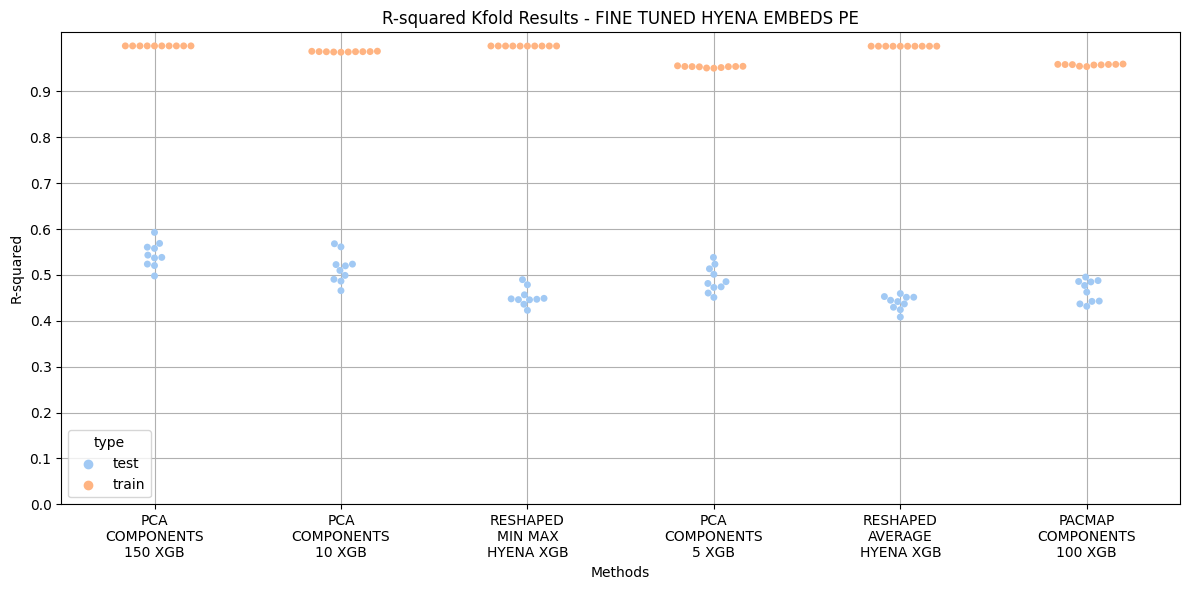

In [4]:
def main():
    for kfold_path, plot_dir in DIR_DICT.items():
        print('Path to kfold results:', kfold_path)
        
        kfold_results_files = load_kfold_results(kfold_path)
        if not kfold_results_files:
            continue
        
        kfold_results_dict = read_kfold_results(kfold_results_files)
        if not kfold_results_dict:
            continue
        
        # Get the dictionary name from DIR_DICT
        dict_name = [name for name, path in DIR_DICT.items() if path == plot_dir][0]
        
        create_swarm_plot(kfold_results_dict, plot_dir, dict_name)

if __name__ == "__main__":
    main()